In [4]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [3]:
train_data = pd.read_csv("nagaoka_gc/train/train_data.csv")
train_data.head()

,File name,GC
0,08DE663C,0
1,08EE752D,1
2,08DE663D,0
3,08EE751D,1
4,08DE664B,0


In [2]:
test_data = pd.read_csv("nagaoka_gc/test/test_data.csv")
test_data.head()

,File name,GC
0,08DE762D,0
1,08EE780C,1
2,08EE050C,0
3,08EE972C,1
4,08DE863C,0


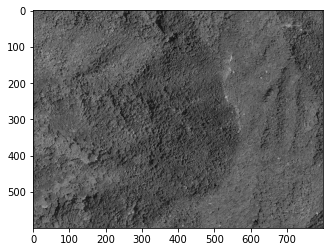

In [6]:
sample_img1 = Image.open("nagaoka_gc/train/08DE663C.jpg").convert("L")
plt.imshow(sample_img1, cmap="gray")

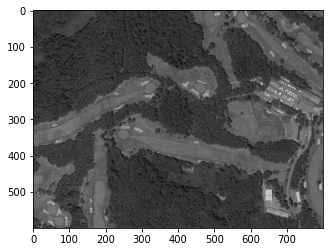

In [7]:
sample_img2 = Image.open("nagaoka_gc/train/08EE752D.jpg").convert("L")
plt.imshow(sample_img2, cmap="gray")

In [8]:
# 画像のサイズ
sample_img1_array = np.array(sample_img1)
sample_img1_array.shape

(600, 800)

In [9]:
# 画像をflatternする
def make_flat_image(path):
    img = Image.open(path).convert("L")
    ary = np.array(img)
    return ary.flatten()

In [10]:
train_len = len(train_data)
train_len

20

In [11]:
X_train = np.empty((train_len, 600 * 800), dtype=np.uint8)
y_train = np.empty(train_len, dtype=np.uint8)

In [15]:
for i in range(train_len):
    data = train_data.loc[i]
    name = data['File name']
    path = 'nagaoka_gc/train/%s.jpg' % name
    X_train[i] = make_flat_image(path)
    y_train[i] = data['GC']

In [16]:
X_train

array([[ 70,  52,  71, ...,  41,  21,  50],
       [ 50,  48,  50, ...,  90,  85,  91],
       [ 50,  54,  46, ...,  26,  52,  71],
       ...,
       [ 72,  53,  88, ..., 114,  90,  75],
       [ 50,  49,  48, ...,  73,  53,  45],
       [171, 166, 168, ..., 116, 113, 116]], dtype=uint8)

In [18]:
y_train

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
      dtype=uint8)

In [19]:
test_len = len(test_data)
test_len

6

In [20]:
X_test = np.empty((test_len, 600 * 800), dtype=np.uint8)
y_test = np.empty(test_len, dtype=np.uint8)

In [21]:
for i in range(test_len):
    data = test_data.loc[i]
    name = data['File name']
    path = 'nagaoka_gc/test/%s.jpg' % name
    X_test[i] = make_flat_image(path)
    y_test[i] = data['GC']

In [22]:
X_test

array([[ 44,  57,  68, ...,  72,  73,  65],
       [ 59,  52,  46, ...,  91, 102,  92],
       [ 64,  64,  64, ...,  69,  81,  81],
       [128, 132, 165, ..., 126, 104, 108],
       [ 73,  78,  81, ..., 132, 160, 134],
       [ 91,  82,  81, ..., 103, 103, 115]], dtype=uint8)

In [23]:
y_test

array([0, 1, 0, 1, 0, 1], dtype=uint8)

In [24]:
svc_class = SVC(kernel='linear', gamma='scale', random_state=0)

In [25]:
svc_class.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
svc_class.score(X_test, y_test)

0.8333333333333334

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf_model = RandomForestRegressor()

In [29]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
rf_model.score(X_test, y_test)

0.4112

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt_model = DecisionTreeClassifier()

In [33]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
dt_model.score(X_test, y_test)

0.5